<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Sklearn/Module_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np

In [53]:
url = 'bestsellers with categories.csv'

In [54]:
df = pd.read_csv(url)
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


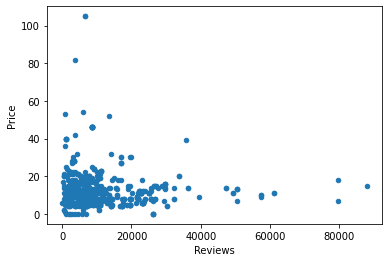

In [55]:
df.plot(x='Reviews', y='Price', kind = "scatter");

# Linear Regression

$$h=w0 + w1*x$$

In [56]:
def h(w0, w1, x):
  return w0+w1*x


### Compute cost function

In [98]:
df['Reviews'].shape[0]

550

In [99]:
def cost_function(w0, w1, df):

  n = df.Reviews.shape[0]
  cost = 0
  for x, y in zip(df.Reviews, df.Price):
    cost = cost + (h(w0, w1, x)-y)**2

  return cost/2/n

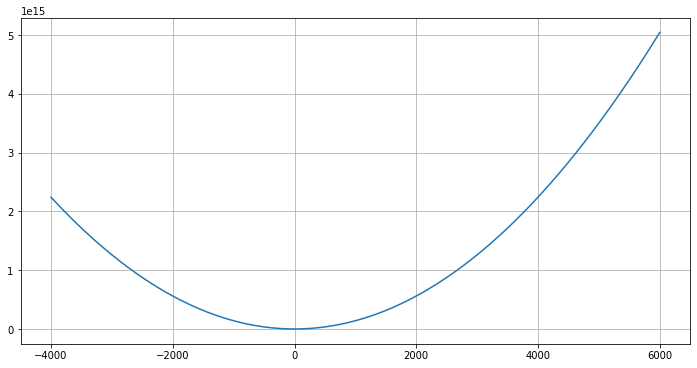

In [100]:
import matplotlib.pyplot as plt

w0 = 0
w1 = np.linspace(-4000, 6000, 500)

plt.figure(figsize=(12, 6))
plt.plot(w1, [cost_function(0, w, df) for w in w1])
plt.grid()

# Gradient descent

### Compute gradients

In [95]:
def grad(w0, w1, df):

  d_w0 = 0
  d_w1 = 0
  n = df.Reviews.shape[0]

  for x, y in zip(df.Reviews, df.Price):
    d_w0 = d_w0 + (h(w0, w1, x)-y)
    d_w1 = d_w1 + (h(w0, w1, x)-y)**2

  return d_w0/n, d_w1/n


### Compute GD

In [96]:
def gradient_desc(w0, w1, df, iter_num, alpha):

  cost_history = []

  for i in range(iter_num):
    d_w0, d_w1 = grad(w0, w1, df)
    cost_history.append(cost_function(w0, w1, df))
    w0 = w0 - alpha*d_w0
    w1 = w1 - alpha*d_w1

  cost_history.append(cost_function(w0, w1, df))

  return w0, w1, cost_history

In [ ]:
# train_w0, train_w1, cost_history = gradient_desc(1, 100, df[:10], 100, 0.00001)

In [101]:
from sklearn import linear_model

In [102]:
model = linear_model.LinearRegression()

In [124]:
X = np.array([df.Reviews]).T

In [125]:
X.shape

(550, 1)

In [122]:
Y = np.array([df.Price]).T
Y.shape

(550, 1)

In [126]:
model.fit(X, Y)

LinearRegression()

In [127]:
model.coef_

array([[-0.00010091]])

In [128]:
model.intercept_

array([14.30619553])

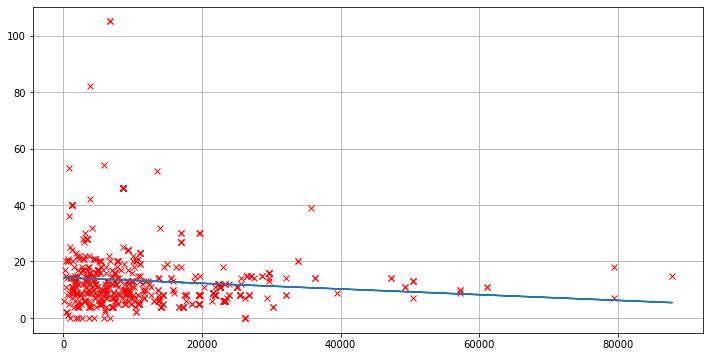

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(df.Reviews, df.Price, 'rx')
plt.plot(X, model.predict(X))
plt.grid()

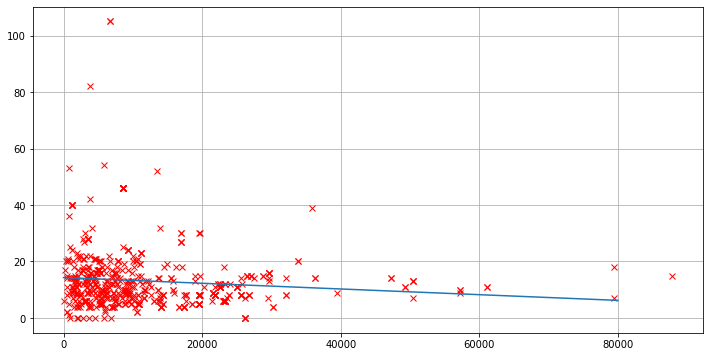

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(df.Reviews, df.Price, 'rx')

x = np.linspace(0, 80000,1000)
plt.plot(x, h(model.intercept_[0], model.coef_[0][0], x))
plt.grid()